<font face="Times New Roman">
<div dir=ltr align=center>
<font color=3C99D size=6>
   Network Motifs & Neural Dynamics

# Network Motifs

#### 1.A

In [1]:
import numpy as np

lines = []
with open('./coliInterFullVec.txt','r') as f:
  lines = f.readlines()

node = 0
edge = len(lines)
for l in lines:
  node = max(node, int(l.strip().split()[0]), int(l.strip().split()[1]))

network = np.zeros((node, node), int)

for l in lines:
  i = int(l.strip().split()[0]) - 1
  j = int(l.strip().split()[1]) - 1
  v = int(l.strip().split()[2])
  network[i, j] = v

nar = []
par = []
dp = []
dn = []
fan = []
cascade = []
ffl = []
for (i, j), v in np.ndenumerate(network):
  # par and nar
  if i == j:
    if v == 1 or v == 3:
      par.append(i+1)
    elif v == 2 or v == 3:
      nar.append(i+1)
  else:
    if i < j:
      # double positive
      if (v == 1 or v == 3) and (network[j, i] == 1 or network[j, i] == 3):
        dp.append((i+1, j+1))
      # double negative
      elif (v == 2 or v == 3) and (network[j, i] == 2 or network[j, i] == 3):
        dn.append((i+1, j+1))
    if (v == 1 or v == 3):
      # fan out
      for (k, e) in enumerate(network[i][j+1:]):
        _k = k+j+1
        if (e == 1 or e == 3) and (network[j,i]==0 and network[_k,i]==0 and network[_k,j]==0 and network[j,_k]==0):
          fan.append((i+1, (j+1, _k+1)))
      # cascade
      for (k, e) in enumerate(network[:, i]):
        if (k != j and k != i and (e == 1 or e == 3)) and (network[k,j]==0 and network[i,k]==0 and network[j,i]==0 and network[j,k]==0):
          cascade.append((k+1, i+1, j+1))
      # ffl
      for (k, e) in enumerate(network[i,:]):
        if (k != j and k != i and (e == 1 or e == 3)) and (network[j,i]==0 and network[k,i]==0):
          if (network[j, k] == 1 or network[j, k] == 3) and network[k, j] == 0:
            ffl.append((i+1, (j+1, k+1)))

loop = len(nar) + len(par)
double = len(dn) + len(dp)
ecoli = [loop, double, len(fan), len(cascade), len(ffl)]
print(len(par), len(nar), len(dp), len(dn), len(fan), len(cascade), len(ffl))
print(loop, double, len(fan), len(cascade), len(ffl))

17 42 0 0 98 86 28
59 0 98 86 28


In [2]:
import pandas as pd

df = pd.DataFrame(par)
df[0] = df[0].astype('int')
df.sort_values(by=0, axis=0, inplace=True)
df.to_csv('par.csv', sep=",", header=False, index=False)

df = pd.DataFrame(nar)
df[0] = df[0].astype('int')
df.sort_values(by=0, axis=0, inplace=True)
df.to_csv('nar.csv', sep=",", header=False, index=False)

In [3]:
import pandas as pd

df = pd.DataFrame(ffl)
df[0] = df[0].astype('int')
df.sort_values(by=0, axis=0, inplace=True)
df.to_csv('FFL.tsv', sep="\t", header=False, index=False)
df

,0,1
0,17,"(18, 24)"
1,19,"(20, 66)"
2,21,"(20, 66)"
3,22,"(20, 66)"
4,23,"(20, 66)"
5,57,"(56, 66)"
6,67,"(68, 292)"
7,120,"(127, 346)"
8,129,"(56, 66)"
9,132,"(137, 136)"


In [4]:
import pandas as pd
a = []
for f in fan:
  _1 = f[0]
  _2 = f[1][0]
  _3 = f[1][1]
  a.append([_1, (_2, _3)])

df = pd.DataFrame(a)
df.sort_values(by=0, axis=0, inplace=True)
df.to_csv('fan_out.tsv', sep="\t", header=False, index=False)
df

,0,1
0,5,"(66, 143)"
1,5,"(66, 282)"
2,5,"(143, 282)"
3,7,"(282, 413)"
4,13,"(66, 282)"
...,...,...
93,390,"(66, 389)"
94,406,"(64, 344)"
95,422,"(198, 346)"
96,423,"(241, 359)"


In [5]:
import pandas as pd

df = pd.DataFrame(cascade)
df[0] = df[0].astype('int')
df.sort_values(by=0, axis=0, inplace=True)
df.to_csv('cascade.tsv', sep="\t", header=False, index=False)
df

,0,1,2
80,2,359,358
0,17,18,282
1,17,24,143
2,18,24,143
3,47,46,346
...,...,...,...
33,367,137,136
34,381,137,136
46,381,137,193
13,406,64,282


# Neural Dynamics

#### 1.B

In [6]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00


In [7]:
import igraph as ig
from math import sqrt
import pandas as pd

def get_subgraphs(graph):
  graph = np.array(graph)
  loop = []
  double = []
  fan = []
  cascade = []
  ffl = []
  for (i, j), v in np.ndenumerate(graph):
    if i == j:
      if v == 1:
        loop.append(i+1)
    else:
      if i < j:
        if v == 1 and graph[j, i] == 1:
          double.append((i, j))
      if v == 1:
        for (k, e) in enumerate(graph[i][j+1:]):
          _k = k+j+1
          if e == 1 and (graph[j,i]==0 and graph[_k,i]==0 and graph[_k,j]==0 and graph[j,_k]==0):
            fan.append((i, (j, _k)))

        for (k, e) in enumerate(graph[:, i]):
          if (k != j and k != i and e == 1) and (graph[k,j]==0 and graph[i,k]==0 and graph[j,i]==0 and graph[j,k]==0):
            cascade.append((k, i, j))

        for (k, e) in enumerate(graph[i,:]):
          if (k != j and k != i and e == 1) and (graph[j,i]==0 and graph[k,i]==0):
            if graph[j, k] == 1 and graph[k, j] == 0:
              ffl.append((i, (j, k)))
  
  return [len(loop), len(double), len(fan) , len(cascade), len(ffl)]

# def z_test(ecoli, mean, s, n):
#   return ((mean - ecoli) / (s/sqrt(n)))

graphs = []
num = 500
for i in range(num):
  graphs.append(ig.Graph.Erdos_Renyi(n=node, m=edge, directed=True, loops=True).get_adjacency().data)

values = np.ndarray((num, 5), dtype=int)
for (i, g) in enumerate(graphs):
  values[i,:] = get_subgraphs(g)

mean = np.mean(values, axis=0)
std = np.std(values, axis=0)

df = pd.DataFrame([ecoli, mean, std], columns=['Loop', 'Double', 'Fan Out', 'Cascade', 'FFL'], index=['Ecoli', 'Mean', 'Standard Deviation'])
df

,Loop,Double,Fan Out,Cascade,FFL
Ecoli,59.000000,0.000000,98.000000,86.000000,28.000000
Mean,1.444000,0.968000,385.252000,773.134000,2.546000
Standard Deviation,1.201193,0.954451,19.719445,28.125932,1.628461


#### 2.B

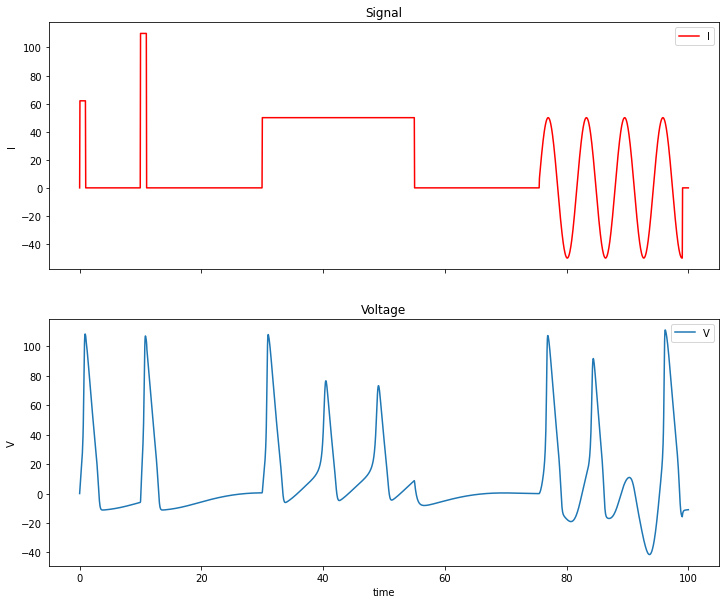

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import exp

np.random.seed(0)

v0 = 0

g_na = 120
g_k = 36
g_l = 0.3

v_na = 115
v_k = -12
v_l = 10.6

def I_t(t):
  if 0.0 < t < 1.0:
    return 62.0
  elif 10.0 < t < 11.0:
    return 110.0
  elif 30.0 < t < 55.0:
    return 50.0
  elif 75.5 < t < 99.0:
    return 50*np.sin(t)
  else:
    return 0.0

def _dydt(y, t):
  dy = np.zeros(4)

  v = y[0]
  m = y[1]
  n = y[2]
  h = y[3]
  
  dy[0] = -g_na * m**3 * h * (v - v_na) - g_k * n**4 * (v - v_k) - g_l * (v - v_l) + I_t(t)
  dy[1] = (alpha('m', v) * (1 - m)) - (beta('m', v) * m)
  dy[2] = (alpha('n', v) * (1 - n)) - (beta('n', v) * n)
  dy[3] = (alpha('h', v) * (1 - h)) - (beta('h', v) * h)

  return dy

def x_0(var):
  return alpha(var, v0) / (alpha(var, v0) + beta(var, v0))

def alpha(var, v):
  if var == 'm':
    a = (2.5 - 0.1*v) / (exp(2.5 - 0.1*v) - 1.0)
  elif var == 'n':
    a = (0.1 - 0.01*v) / (exp(1.0 - 0.1*v) - 1.0)
  else:
    a = 0.07 * exp(-v / 20.0)
  return a

def beta(var, v):
  if var == 'm':
    b = 4.0 * exp(-v / 18.0)
  elif var == 'n':
    b = 0.125 * exp(-v / 80.0)
  else:
    b = 1.0 / (exp(3.0 - 0.1*v) + 1.0)
  return b

t = np.linspace(0, 100, 2000)
y = odeint(_dydt, [v0, x_0('m'), x_0('n'), x_0('h')], t)

fig, axs = plt.subplots(2, figsize=(12, 10), sharex=True)

axs[0].set_title('Signal')
axs[1].set_title('Voltage')

axs[0].plot(t, [I_t(i) for i in t], label='I', color='red')
axs[1].plot(t, y[:, 0], label='V')

axs[0].set(xlabel='time', ylabel='I')
axs[0].label_outer()
axs[0].legend()
axs[1].set(xlabel='time', ylabel='V')
axs[1].label_outer()
axs[1].legend()